In [ ]:
# ===============================
# Kidney Classification - Colab Training using Folder Names
# ===============================

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# -------------------------
# 1. Mount Google Drive
# -------------------------
drive.mount('/content/drive')

# -------------------------
# 2. Paths and Config
# -------------------------
DATASET_ROOT = "/content/drive/MyDrive/Data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128
EPOCHS = 10
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
TEST_SIZE = 0.2

# -------------------------
# 3. Load Images
# -------------------------
print("Loading dataset...")
X, y, class_names = [], [], []

for idx, class_name in enumerate(sorted(os.listdir(DATASET_ROOT))):
    class_path = os.path.join(DATASET_ROOT, class_name)
    if not os.path.isdir(class_path):
        continue
    class_names.append(class_name)
    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)
        if not os.path.isfile(fpath):
            continue
        if os.path.splitext(fpath)[1].lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".webp"]:
            continue
        try:
            img = Image.open(fpath).convert("RGB")
            img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
            X.append(np.array(img, dtype=np.float32) / 255.0)
            y.append(idx)
        except:
            continue

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)
print(f"Dataset loaded: {X.shape[0]} images, Classes: {class_names}")

# -------------------------
# 4. Split Data
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# -------------------------
# 5. Model
# -------------------------
model = models.Sequential([
    layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -------------------------
# 6. Train
# -------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    verbose=1
)

# -------------------------
# 7. Evaluate
# -------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# -------------------------
# 8. Save Model
# -------------------------
model_save_path = "/content/drive/MyDrive/Data/kidney_cnn.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Dataset loaded: 11087 images, Classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
Train: (8869, 128, 128, 3), Test: (2218, 128, 128, 3)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,140 (32.36 MB)

 Trainable params: 8,483,140 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7433 - loss: 0.6721 - val_accuracy: 0.9887 - val_loss: 0.0308
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9813 - loss: 0.0491 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9989 - val_loss: 0.0068
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9974 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 3.1865e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 1.0000 - loss: 9.4445e-04 - val_accuracy: 1.0000 - val_loss: 1.1666e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9974 - loss: 0.00

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step



Classification Report:

              precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       742
      Normal       1.00      1.00      1.00      1016
       Stone       1.00      1.00      1.00       275
       Tumor       1.00      0.99      1.00       185

    accuracy                           1.00      2218
   macro avg       1.00      1.00      1.00      2218
weighted avg       1.00      1.00      1.00      2218

Model saved to /content/drive/MyDrive/Data/kidney_cnn.h5


In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')
DATASET_ROOT = "/content/drive/MyDrive/Data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

for folder in sorted(os.listdir(DATASET_ROOT)):
    path = os.path.join(DATASET_ROOT, folder)
    if os.path.isdir(path):
        num_files = len([f for f in os.listdir(path) if f.lower().endswith((".jpg",".jpeg",".png"))])
        print(f"{folder}: {num_files} images")


Mounted at /content/drive
Cyst: 3709 images
Normal: 5077 images
Stone: 1377 images
Tumor: 924 images


Classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Cyst (Confidence: 1.00)


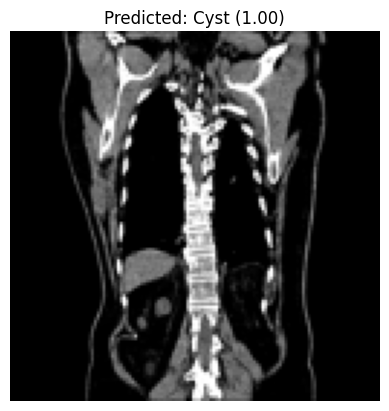

In [5]:
# ===============================
# Kidney Classification - Test Single Image
# ===============================

import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import drive

# -------------------------
# 1. Paths
# -------------------------
DATASET_ROOT = "/content/drive/MyDrive/Data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
MODEL_PATH = "/content/drive/MyDrive/Data/kidney_cnn.h5"
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128

# -------------------------
# 2. Load Model
# -------------------------
model = load_model(MODEL_PATH)

# -------------------------
# 3. Rebuild Class Names
# -------------------------
class_names = sorted([
    d for d in os.listdir(DATASET_ROOT)
    if os.path.isdir(os.path.join(DATASET_ROOT, d))
])
print("Classes:", class_names)

# -------------------------
# 4. Prediction Function
# -------------------------
def predict_image(image_path, model, class_names):
    # Load image
    img = Image.open(image_path).convert("RGB")
    img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))

    # Preprocess (normalize + batch dimension)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape (1, 128, 128, 3)

    # Predict
    preds = model.predict(img_array)
    class_idx = np.argmax(preds)
    confidence = np.max(preds)

    return class_names[class_idx], confidence, img

# -------------------------
# 5. Test with a Sample Image
# -------------------------
sample_path = "/content/drive/MyDrive/Data/sample_kidney.jpg"  # change this path to your test image
pred_class, pred_conf, img = predict_image(sample_path, model, class_names)

print(f"Prediction: {pred_class} (Confidence: {pred_conf:.2f})")

# -------------------------
# 6. Show Image with Prediction
# -------------------------
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({pred_conf:.2f})")
plt.axis("off")
plt.show()
